In [97]:
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import mdshare
import pyemma
import seaborn as sns

## Data loading

In [2]:
!pwd

/home/yuki/mnt/main/acd/analysis


In [3]:
# coordinate file lists
BASE_DIR = '/home/yuki/mnt/'
p_main = Path(BASE_DIR + 'main/acd')
p_extension = Path(BASE_DIR + 'extension/acd')
traj_files_main = list(p_main.glob('20*/production_dry.nc'))
traj_files_extension = list(p_extension.glob('20*/extension_dry.nc'))

In [4]:
traj_files_main = [file.as_posix() for file in traj_files_main]
traj_files_extension = [file.as_posix() for file in traj_files_extension]

In [8]:
feat_mindist = pyemma.coordinates.featurizer(BASE_DIR + 'main/acd/analysis/repo/stripped.initial_wat_ion.parm7')

In [9]:
feat_mindist.add_group_mindist([range(630), range(630, 1260)])

In [12]:
data_mindist = pyemma.coordinates.load(traj_files_main, features=feat_mindist)

In [100]:
with open('data_mindist.pickle', 'wb') as f:
    pickle.dump(data_mindist, f)

In [17]:
print(len(data_mindist))
print(data_mindist[0].shape)

397
(500, 1)


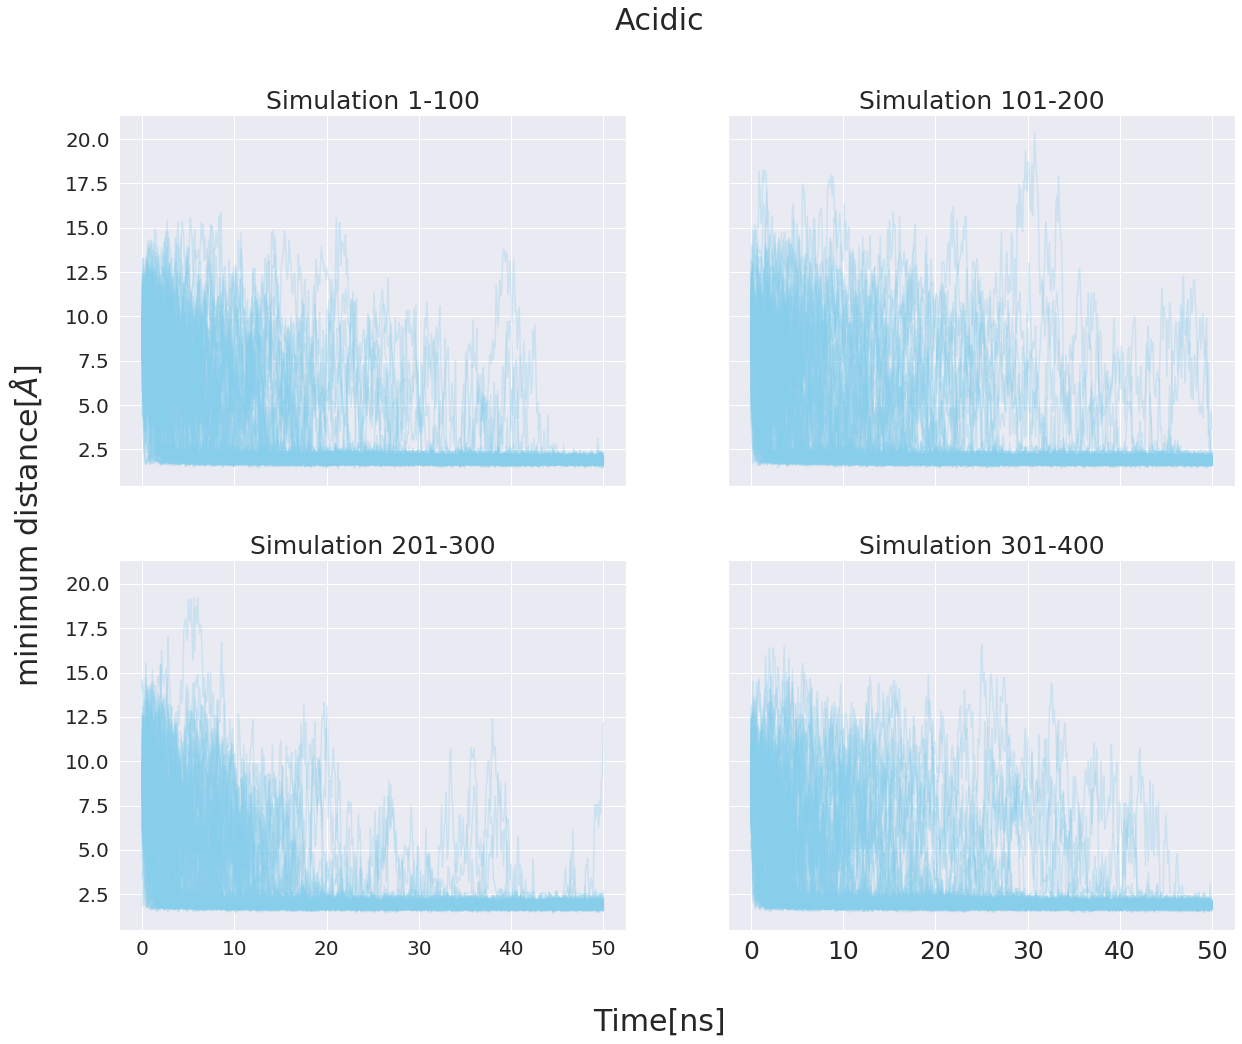

In [96]:
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(20,15), sharex=True, sharey=True)
axes = axes.flatten()
fig.suptitle('Acidic', fontsize=30)
fig.text(0.5, 0.04, 'Time[ns]', ha='center', va='center', fontsize=30)
fig.text(0.06, 0.5, 'minimum distance[$\AA$]', ha='center', va='center', rotation='vertical', fontsize=30)
x = np.linspace(0, 50, 500)

for i in range(0,400):
    if i in range(0, 100):
        axes[0].plot(x, data_mindist[i].T[0] * 10, alpha=0.3, c='skyblue')
        axes[0].set_title('Simulation 1-100', fontsize=25)
        for tick in axes[0].xaxis.get_major_ticks():
            tick.label.set_fontsize(20)
        for tick in axes[0].yaxis.get_major_ticks():
            tick.label.set_fontsize(20)

    elif i in range(100, 200):
        axes[1].plot(x, data_mindist[i].T[0] * 10, alpha=0.3, c='skyblue')
        axes[1].set_title('Simulation 101-200', fontsize=25)
        for tick in axes[1].xaxis.get_major_ticks():
            tick.label.set_fontsize(20)
        for tick in axes[1].yaxis.get_major_ticks():
            tick.label.set_fontsize(20)

    elif i in range(200, 300):
        axes[2].plot(x, data_mindist[i].T[0] * 10, alpha=0.3, c='skyblue')
        axes[2].set_title('Simulation 201-300', fontsize=25)
        for tick in axes[2].xaxis.get_major_ticks():
            tick.label.set_fontsize(20)
        for tick in axes[2].yaxis.get_major_ticks():
            tick.label.set_fontsize(20)

    elif i in range(300, 397):
        axes[3].plot(x, data_mindist[i].T[0] * 10, alpha=0.3, c='skyblue')
        axes[3].set_title('Simulation 301-400', fontsize=25)
        for tick in axes[3].xaxis.get_major_ticks():
            tick.label.set_fontsize(25)
        for tick in axes[3].yaxis.get_major_ticks():
            tick.label.set_fontsize(25)

plt.savefig('minimum_distance_acd.png')

In [177]:
# define features
feat_pep1 = pyemma.coordinates.featurizer('./repo/stripped.initial_wat_ion.parm7') 
feat_pep1.add_backbone_torsions(selstr='resid 0 to 41', periodic=True)

# data loading
data_pep1_main = pyemma.coordinates.load(traj_files_main[:], features=feat_pep1)
data_pep1_extension = pyemma.coordinates.load(traj_files_extension[:], features=feat_pep1)

# truncate trajectories
# data_pep1_main_truncated = [i[250:] for i in data_pep1_main]
# data_pep1 = data_pep1_main_truncated + data_pep1_extension
data_pep1 = data_pep1_main + data_pep1_extension

In [178]:
# define features
feat_pep2 = pyemma.coordinates.featurizer('./repo/stripped.initial_wat_ion.parm7') 
feat_pep2.add_backbone_torsions(selstr='resid 42 to 83', periodic=True)

# data loading
data_pep2_main = pyemma.coordinates.load(traj_files_main[:], features=feat_pep2)
data_pep2_extension = pyemma.coordinates.load(traj_files_extension[:], features=feat_pep2)

# truncate trajectories
# data_pep2_main_truncated = [i[250:] for i in data_pep2_main]
# data_pep2 = data_pep2_main_truncated + data_pep2_extension
data_pep2 = data_pep2_main + data_pep2_extension

In [179]:
data = data_pep1 + data_pep2
# data = data_pep1[:401] + data_pep2[:401]
len(data)

812

In [180]:
data_concatenated = np.concatenate(data)
data_concatenated.shape

(571748, 82)

In [181]:
pca = pyemma.coordinates.pca(data, dim=30)
pca_concatenated = np.concatenate(pca.get_output())

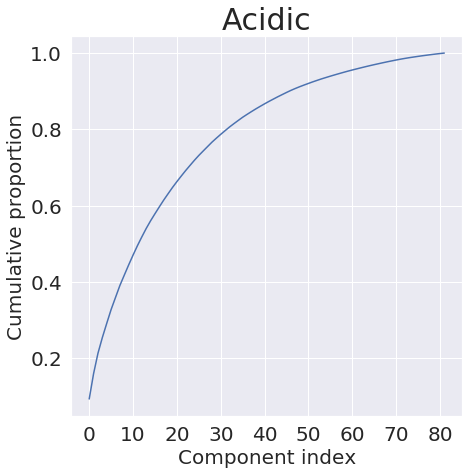

In [256]:
sns.set()
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(range(pca.cumvar.size), pca.cumvar)

ax.set_xlabel('Component index', fontsize=20)
ax.set_ylabel('Cumulative proportion', fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax.set_title('Acidic', fontsize=30)

plt.savefig('cum_dist_acd.png')

In [183]:
cluster = pyemma.coordinates.cluster_kmeans(pca.get_output(), k=500, max_iter=50, stride=10)

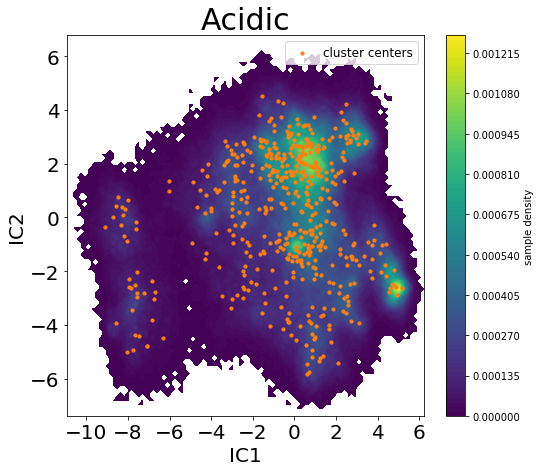

In [225]:
sns.reset_orig()

fig, ax = plt.subplots(figsize=(8,7))
pyemma.plots.plot_density(*pca_concatenated.T[:2], ax=ax, cbar=True)
ax.scatter(*cluster.clustercenters.T[:2], s=10, c='C1', label='cluster centers')
ax.set_xlabel('IC1', fontsize=20)
ax.set_ylabel('IC2', fontsize=20)
ax.set_title('Acidic', fontsize=30)
ax.legend(fontsize=12)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.savefig('pca_densitymap_acd.png')

In [116]:
its = pyemma.msm.its(cluster.dtrajs, nits=6, errors='bayes')

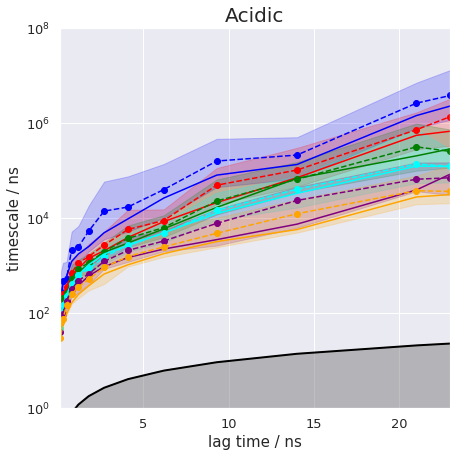

In [118]:
sns.set()

fig, ax = plt.subplots(figsize=(7,7))
pyemma.plots.plot_implied_timescales(its, ylog=True, units='ns', dt=0.1, confidence=0.95)
ax.set_title('Acidic', fontsize=20)
ax.set_ylim(1, 10e7)
plt.gca().xaxis.get_label().set_fontsize(15)
plt.gca().yaxis.get_label().set_fontsize(15)
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(13)


plt.savefig('lag_time_acd.png')

### monomer

In [134]:
top_path = '/home/yuki/mnt/structure-ini/T-REMD/acd/analysis/prmtop.parm7'
traj_path = '/home/yuki/mnt/structure-ini/T-REMD/acd/analysis/mdcrd.310.nc'

In [135]:
feat_monomer = pyemma.coordinates.featurizer(top_path)
feat_monomer.add_backbone_torsions(selstr='resid 0 to 41', periodic=False)

In [136]:
data_monomer = pyemma.coordinates.load(traj_path, features=feat_monomer)

In [186]:
converted_data_monomer = pca.transform(data_monomer)
converted_data_monomer.shape

(25000, 30)

In [187]:
cluster_monomer = pyemma.coordinates.cluster_kmeans(converted_data_monomer, k=100, max_iter=50, stride=10)

/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/

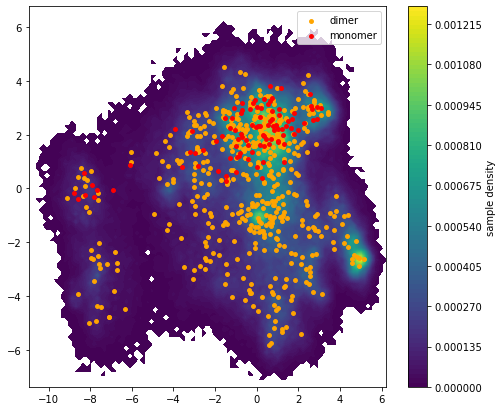

In [188]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(8,7))
pyemma.plots.plot_density(*pca_concatenated.T[:2], ax=ax, cbar=True)
ax.scatter(*cluster.clustercenters.T[:2], c='orange', label='dimer', s=15)
ax.scatter(*cluster_monomer.clustercenters.T[:2], c='red', label='monomer', s=15)

plt.legend()
plt.savefig('monomer_dimer_acd.png')

### msm

In [189]:
msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=60, dt_traj='100 ps')

In [190]:
msm.active_state_fraction

1.0

### macro states

In [306]:
nstates = 10
msm.pcca(nstates)

PCCA(P=array([[5.74725e-01, 0.00000e+00, ..., 0.00000e+00, 6.77547e-04],
       [0.00000e+00, 5.76382e-01, ..., 2.07157e-02, 0.00000e+00],
       ...,
       [0.00000e+00, 3.59567e-02, ..., 3.30260e-01, 0.00000e+00],
       [4.73373e-04, 0.00000e+00, ..., 0.00000e+00, 5.49383e-01]]),
   m=10)

In [307]:
for i, s in enumerate(msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, msm.pi[s].sum()))

π_1 = 0.002361
π_2 = 0.019440
π_3 = 0.022883
π_4 = 0.021747
π_5 = 0.025342
π_6 = 0.030865
π_7 = 0.032544
π_8 = 0.044447
π_9 = 0.069731
π_10 = 0.730641


In [308]:
dtrajs_concatenated = np.concatenate(cluster.dtrajs)
dtrajs_concatenated.shape

(571748,)

In [309]:
dtrajs_concatenated_connected = np.array([i for i in dtrajs_concatenated if i <= 496])
dtrajs_concatenated_connected

array([239, 364, 423, ..., 263, 152, 263], dtype=int32)

In [310]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated_connected]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [311]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

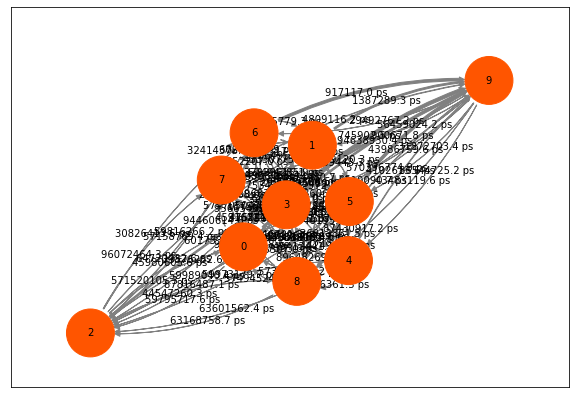

In [312]:
fig, ax = plt.subplots(figsize=(10, 7))
# _, _, misc = pyemma.plots.plot_state_map(
#     *data_concatenated.T, metastable_traj, ax=ax, zorder=-1)
# misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
#     pos=coarse_state_centers,
#     figpadding=0,
    arrow_label_format='%.1f ps',
    arrow_labels=mfpt,
#     size=12,
    show_frame=True,
    ax=ax)

# ax.set_title('Acidic', fontsize=20)

# ax.set_xlabel('$\Phi$')
# ax.set_ylabel('$\Psi$')
# ax.set_xlim(-np.pi, np.pi)
# ax.set_ylim(-np.pi, np.pi)
# fig.tight_layout()

# plt.savefig('macrostates_acd.png')
plt.show()

/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/

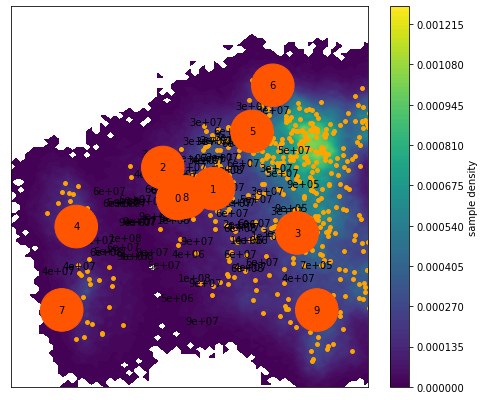

In [313]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(8,7))
pyemma.plots.plot_density(*pca_concatenated.T[:2], ax=ax, cbar=True)
ax.scatter(*cluster.clustercenters.T[:2], c='orange', label='dimer', s=15)
# ax.scatter(*cluster_monomer.clustercenters.T[:2], c='red', label='monomer', s=15)

# ax.scatter(*coarse_state_centers.T[:2], c='blue', s=20)
pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
#     figpadding=0,
#     arrow_label_format='%.1f ps',
    arrow_labels=mfpt,
#     size=12,
    show_frame=True,
    ax=ax)

# ax.set_xlim(-7, 10)
# ax.set_ylim(-7, 7)


# plt.legend()
plt.show()
# plt.savefig('monomer_dimer_neu.png')

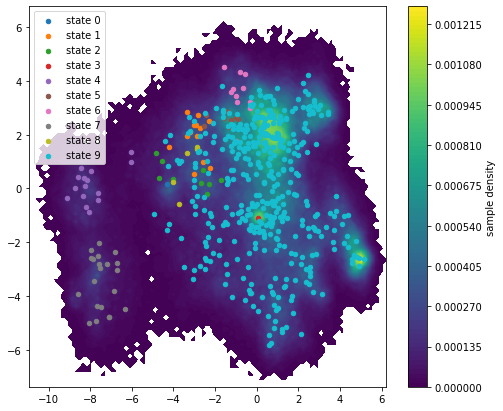

In [314]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(8,7))
pyemma.plots.plot_density(*pca_concatenated.T[:2], ax=ax, cbar=True)
for state in range(nstates):
    ax.scatter(*np.array([coord for i, coord in enumerate(cluster.clustercenters) if i in msm.metastable_sets[state]]).T[:2], s=20, label=f'state {state}')

plt.legend()
# plt.savefig('macrostates_acd.png')

In [315]:
for i, s in enumerate(msm.metastable_sets):
    print('π_{} = {:f}'.format(i, msm.pi[s].sum()))

π_0 = 0.002361
π_1 = 0.019440
π_2 = 0.022883
π_3 = 0.021747
π_4 = 0.025342
π_5 = 0.030865
π_6 = 0.032544
π_7 = 0.044447
π_8 = 0.069731
π_9 = 0.730641


### Calculation of physical values

In [299]:
import mdtraj


In [317]:
msm.metastable_sets

[array([142]),
 array([ 29,  71,  89, 110, 145, 205, 224, 235, 310, 319, 371, 384, 418]),
 array([ 22,  69,  85, 164, 291, 295, 309, 435, 494]),
 array([33]),
 array([ 17,  31,  76, 102, 125, 139, 177, 190, 256, 262, 282, 332, 365,
        410, 420]),
 array([ 16,  51,  63,  90, 226, 372, 392, 407, 445]),
 array([  9, 128, 146, 161, 186, 357, 370, 378, 404, 411, 487]),
 array([  5,  14,  56, 152, 168, 172, 191, 210, 263, 301, 313, 318, 337,
        347, 353, 361, 368, 389, 476, 489, 491]),
 array([ 15,  46,  99, 154, 316, 402]),
 array([  0,   1,   2,   3,   4,   6,   7,   8,  10,  11,  12,  13,  18,
         19,  20,  21,  23,  24,  25,  26,  27,  28,  30,  32,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  47,  48,  49,
         50,  52,  53,  54,  55,  57,  58,  59,  60,  61,  62,  64,  65,
         66,  67,  68,  70,  72,  73,  74,  75,  77,  78,  79,  80,  81,
         82,  83,  84,  86,  87,  88,  91,  92,  93,  94,  95,  96,  97,
         98, 100, 101, 103,

In [320]:
for i in range(nstates):
    same_metastates_indices = msm.metastable_sets[i]
    print('metastates index', i)
    print(same_metastates_indices)
# msm.sample_by_state(10)

metastates index 0
[142]
metastates index 1
[ 29  71  89 110 145 205 224 235 310 319 371 384 418]
metastates index 2
[ 22  69  85 164 291 295 309 435 494]
metastates index 3
[33]
metastates index 4
[ 17  31  76 102 125 139 177 190 256 262 282 332 365 410 420]
metastates index 5
[ 16  51  63  90 226 372 392 407 445]
metastates index 6
[  9 128 146 161 186 357 370 378 404 411 487]
metastates index 7
[  5  14  56 152 168 172 191 210 263 301 313 318 337 347 353 361 368 389
 476 489 491]
metastates index 8
[ 15  46  99 154 316 402]
metastates index 9
[  0   1   2   3   4   6   7   8  10  11  12  13  18  19  20  21  23  24
  25  26  27  28  30  32  34  35  36  37  38  39  40  41  42  43  44  45
  47  48  49  50  52  53  54  55  57  58  59  60  61  62  64  65  66  67
  68  70  72  73  74  75  77  78  79  80  81  82  83  84  86  87  88  91
  92  93  94  95  96  97  98 100 101 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 126 127 129 130 131 132
 133 134 1

In [322]:
markov_samples = [smpl for smpl in msm.sample_by_state(10)]

In [330]:
print('length: ', len(markov_samples))
print()
print('0-th value\n', markov_samples[0])

length:  500

0-th value
 [[125 148]
 [ 73   7]
 [ 36 255]
 [ 36 384]
 [ 73 297]
 [ 73 498]
 [183   4]
 [329 313]
 [329 406]
 [ 73 121]]


In [342]:
reader_pep1 = pyemma.coordinates.source(traj_files_main + traj_files_extension, features=feat_pep1)

In [343]:
reader_pep2 = pyemma.coordinates.source(traj_files_main + traj_files_extension, features=feat_pep2)

In [347]:
# samples = [pyemma.coordinates.save_traj(reader, smpl, outfile=None, top='./repo/stripped.initial_wat_ion.parm7') for smpl in markov_samples]
samples = [pyemma.coordinates.save_traj(reader, smpl, outfile=None, top='./repo/stripped.initial_wat_ion.parm7')]data = data_main + data_extension

In [354]:
samples[0].__dir__()

['_topology',
 '_xyz',
 '_rmsd_traces',
 '_unitcell_lengths',
 '_unitcell_angles',
 '_time_default_to_arange',
 '_time',
 '__module__',
 '__doc__',
 '_distance_unit',
 'topology',
 'n_frames',
 'n_atoms',
 'n_residues',
 'n_chains',
 'top',
 'timestep',
 'time',
 'unitcell_vectors',
 'unitcell_volumes',
 'unitcell_lengths',
 'unitcell_angles',
 'xyz',
 '_string_summary_basic',
 '__len__',
 '__add__',
 '__str__',
 '__repr__',
 '__hash__',
 '__eq__',
 'superpose',
 'join',
 'stack',
 '__getitem__',
 'slice',
 '__init__',
 'openmm_positions',
 'openmm_boxes',
 'load',
 '_savers',
 'save',
 'save_hdf5',
 'save_lammpstrj',
 'save_xyz',
 'save_pdb',
 'save_xtc',
 'save_trr',
 'save_dcd',
 'save_dtr',
 'save_binpos',
 'save_mdcrd',
 'save_netcdf',
 'save_netcdfrst',
 'save_amberrst7',
 'save_lh5',
 'save_gro',
 'save_tng',
 'center_coordinates',
 'restrict_atoms',
 'atom_slice',
 'remove_solvent',
 'smooth',
 '_check_valid_unitcell',
 '_have_unitcell',
 'make_molecules_whole',
 'image_molecul

In [358]:
samples[0].n_atoms

1260

In [340]:
reader.trajfiles.__len__()

</home/yuki/miniconda3/envs/pyemma/lib/python3.7/site-packages/decorator.py:decorator-gen-135>:2: PyEMMA_DeprecationWarning: Call to deprecated function "trajfiles". Called from </home/yuki/miniconda3/envs/pyemma/lib/python3.7/site-packages/decorator.py:decorator-gen-135> line 2. Please use "filenames" property.


406

In [346]:
smpl = markov_samples[0]

In [356]:
smpl

array([[125, 148],
       [ 73,   7],
       [ 36, 255],
       [ 36, 384],
       [ 73, 297],
       [ 73, 498],
       [183,   4],
       [329, 313],
       [329, 406],
       [ 73, 121]])

In [359]:
!ls

MSM-PCA-acd.ipynb      data_mindist.pickle  minimum_distance_acd.png  repo
MSM-monomer-acd.ipynb  lag_time_acd.png     monomer_dimer_acd.png
cum_dist_acd.png       macrostates_acd.png  pca_densitymap_acd.png


In [366]:
feat_pep = pyemma.coordinates.featurizer('./repo/protein.pdb') 

In [367]:
feat_pep.add_backbone_torsions()

In [368]:
data_test = pyemma.coordinates.load('../20191223-130952_5f6edd4d/production_pep1.ncdf', features=feat_pep)

In [369]:
data_test.shape

(500, 82)